In [1]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  
import seaborn as sns  
from sklearn import datasets  
from sklearn import manifold  
%matplotlib inline 


In [3]:
data  = datasets.fetch_openml('mnist_784', version = 1, return_X_y = True)

pixel_values, targets = data

In [7]:
data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [9]:
targets = targets.astype(int)


In [11]:
pixel_values.shape

(70000, 784)

visualize the samples in this dataset by reshaping them to their original  shape and then plotting them using matplotlib. 



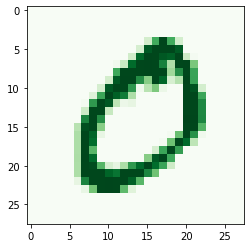

In [19]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='Greens')

In [41]:
#create t-SNE transformation of the data

tsne_3  = manifold.TSNE(n_components=3, random_state=42)
transformed_data_3 = tsne_3.fit_transform(pixel_values[:3000,:])
transformed_data_3

array([[ -5.412594  ,  -8.628935  ,   4.6995044 ],
       [-19.849123  ,  -4.9563737 ,   7.9511876 ],
       [-10.538205  ,  -2.7979145 , -13.563335  ],
       ...,
       [  7.9687796 ,  -6.605765  ,  -5.293416  ],
       [  1.0924462 ,  15.55175   ,  -0.90920645],
       [ -5.7358055 , -16.534098  ,   3.1225648 ]], dtype=float32)

# t-SNE in 3D plane

In [42]:
#column_stack() function is used to stack 1-D arrays as columns into a 2-D array.
#It takes a sequence of 1-D arrays and stack them as columns to make a single 2-D array.
#2-D arrays are stacked as-is
#convert the transformed data into pandas DataFrame
tsne_df_3 = pd.DataFrame(
np.column_stack((transformed_data_3, targets[:3000])),
columns = ['x','y','z', 'targets']
)

tsne_df_3.loc[:, 'targets'] = tsne_df_3.targets.astype(int)

In [43]:
tsne_df_3.head()

,x,y,z,targets
0,-5.412594,-8.628935,4.699504,5
1,-19.849123,-4.956374,7.951188,0
2,-10.538205,-2.797915,-13.563335,4
3,19.938295,3.248330,2.508784,1
4,-1.062732,1.634564,-7.259991,9


C:\Users\varun\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


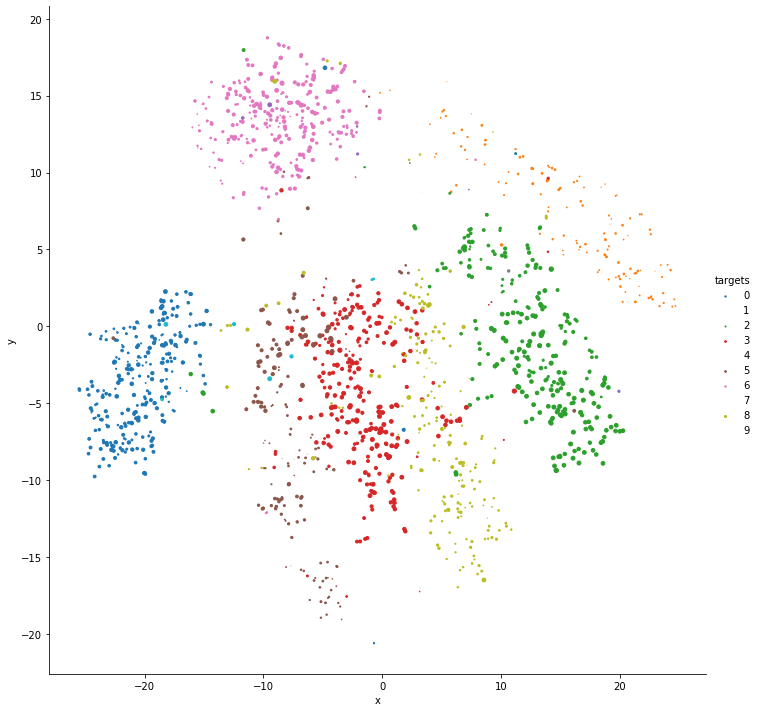

In [46]:
grid = sns.FacetGrid(tsne_df_3, hue = 'targets', size= 10)
grid.map(plt.scatter, 'x', 'y','z').add_legend()

# t-SNE in 2D plane

In [47]:
tsne_2 = manifold.TSNE(n_components=2, random_state=42)
transformed_data_2 = tsne_2.fit_transform(pixel_values[:3000,:])

In [48]:
#t-SNE in 2D plane
tsne_df_2d = pd.DataFrame(
np.column_stack((transformed_data_2, targets[:3000])),
columns = ['x','y', 'targets']
)

tsne_df_2d.loc[:, 'targets'] = tsne_df_2d.targets.astype(int)

C:\Users\varun\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


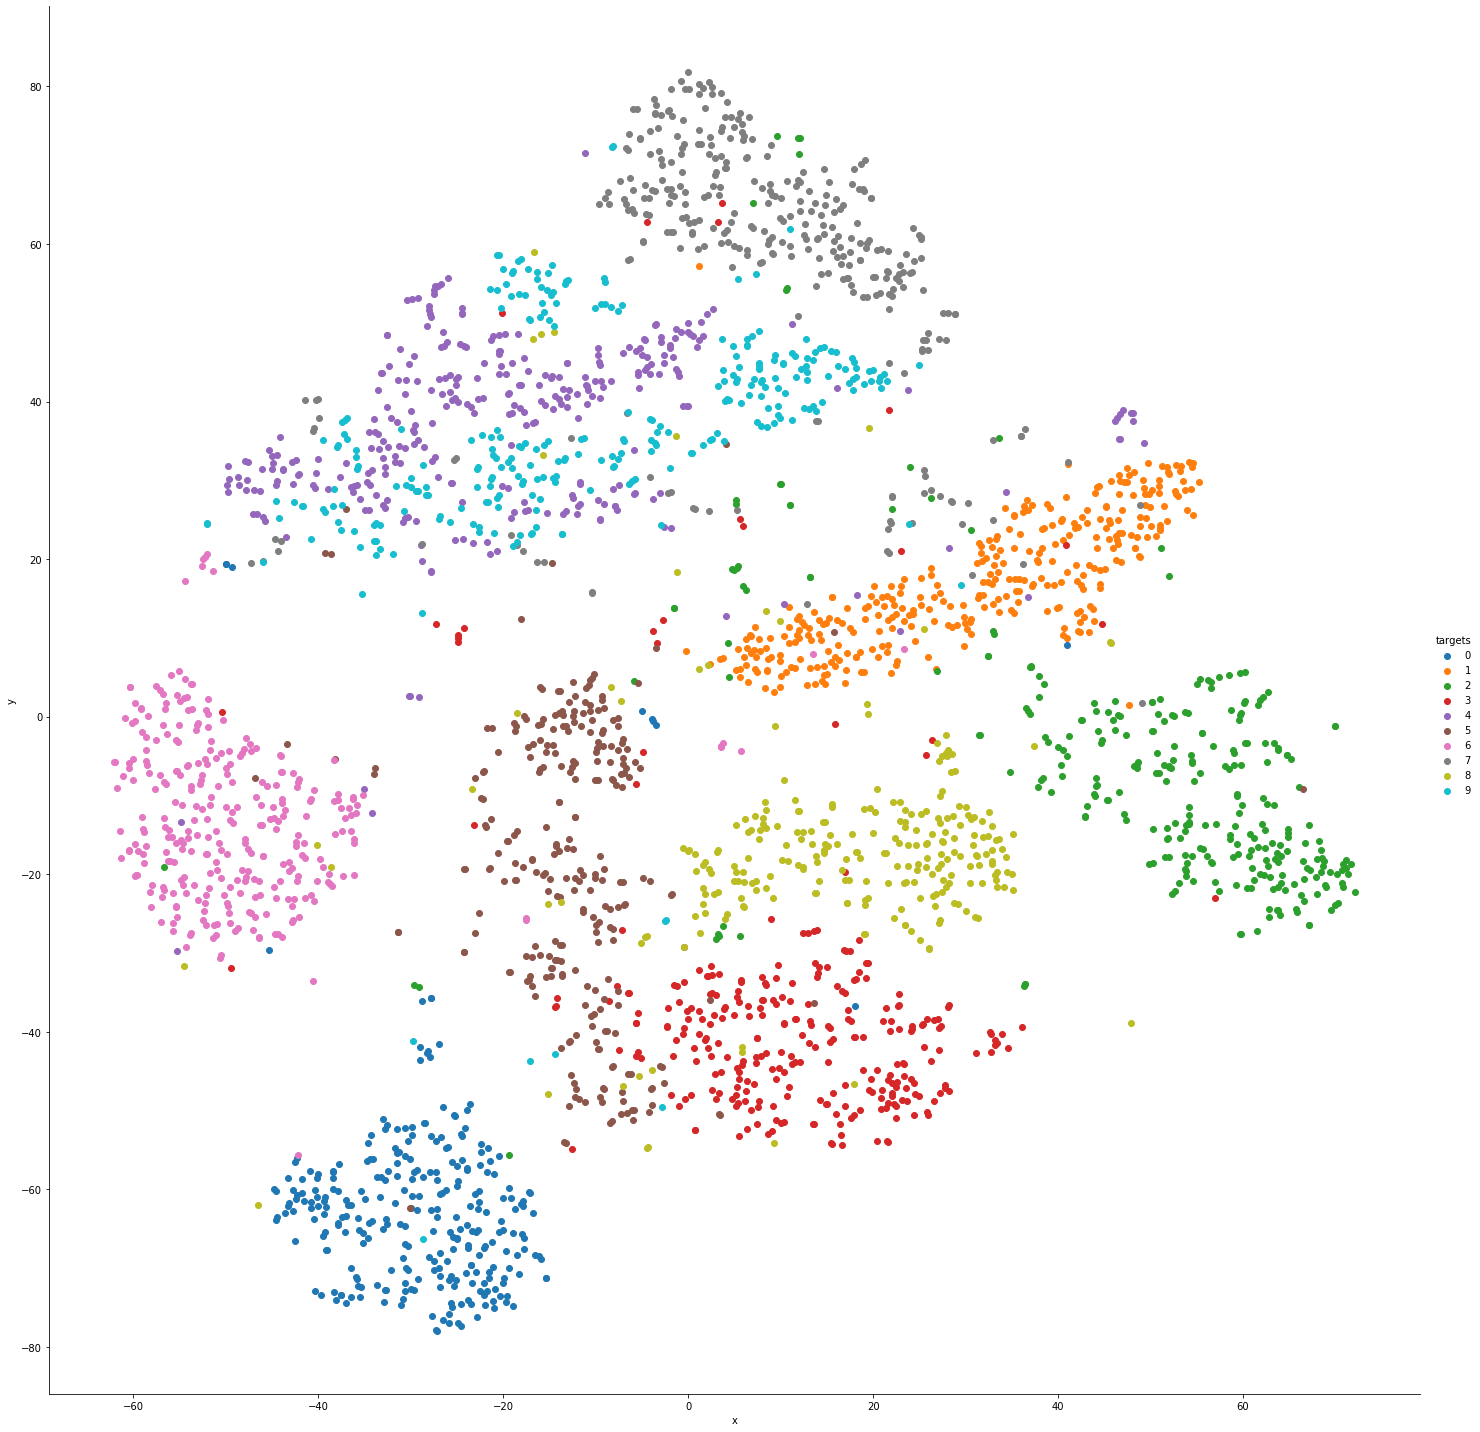

In [49]:
grid = sns.FacetGrid(tsne_df_2d, hue = 'targets', size= 20)
grid.map(plt.scatter, 'x', 'y').add_legend()